# IMU Calibration for Fall Detectin Research
*Codename : Adelaide*

By The Hardware Team Research for Fall Detection Datasets

In [8]:
%pip install matplotlib numpy pandas pyserial

Note: you may need to restart the kernel to use updated packages.


# Accelerometer Calibration

Based on the min and max of every axis.

In [1]:
import serial

ser = serial.Serial()
ser.baudrate = 115200
ser.port = '/dev/ttyACM0'

def reading_accelerometer(buffer):
    rawXYZ = []
    ser.open()
    print("\nReading started.")
    while len(rawXYZ) < buffer:
        line = ser.readline().decode('utf-8').strip()
        if line:
            try:
                x, y, z = map(float, line.split(','))
                rawXYZ.append((x, y, z))
                print(f"Progress: {len(rawXYZ)}", end='\r')
            except ValueError:
                print(f"Invalid data: {line}")

    ser.close()
    print(f"Collected {len(rawXYZ)} readings.")
    return rawXYZ

In [2]:
import time

countdown = 3
reading_counts = 200
print(f"Collecting {reading_counts} readings from {ser.port}...")
for i in range(countdown):
    print(f"Reading start in {countdown - i} seconds...", end='\r')
    time.sleep(1)

rawXYZ = reading_accelerometer(reading_counts)

Reading start in 1 seconds...
Reading started.
Collected 200 readings.


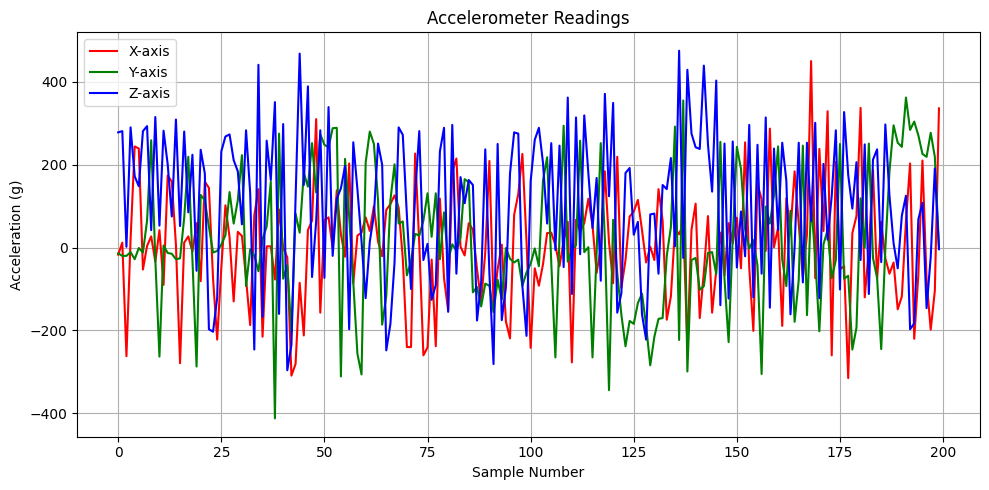

In [3]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
df = pd.DataFrame(rawXYZ, columns=['X', 'Y', 'Z'])
plt.figure(figsize=(10, 5))
plt.plot(df['X'], label='X-axis', color='r')
plt.plot(df['Y'], label='Y-axis', color='g')
plt.plot(df['Z'], label='Z-axis', color='b')

plt.title('Accelerometer Readings')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [5]:
accel_x = df['X'].values
accel_y = df['Y'].values
accel_z = df['Z'].values

max_x = np.max(accel_x)
max_y = np.max(accel_y)
max_z = np.max(accel_z)
min_x = np.min(accel_x)
min_y = np.min(accel_y)
min_z = np.min(accel_z)

accel_cal = [ (max_x + min_x) / 2, 
              (max_y + min_y) / 2, 
              (max_z + min_z) / 2 ]

print(f"Calibration factor values : {min_x}, {max_x}, {min_y}, {max_y}, {min_z}, {max_z}")
print(f"Calibration values: {accel_cal[0]}, {accel_cal[1]}, {accel_cal[2]}")


Calibration factor values : -315.0, 450.0, -412.0, 362.0, -296.0, 475.0
Calibration values: 67.5, -25.0, 89.5


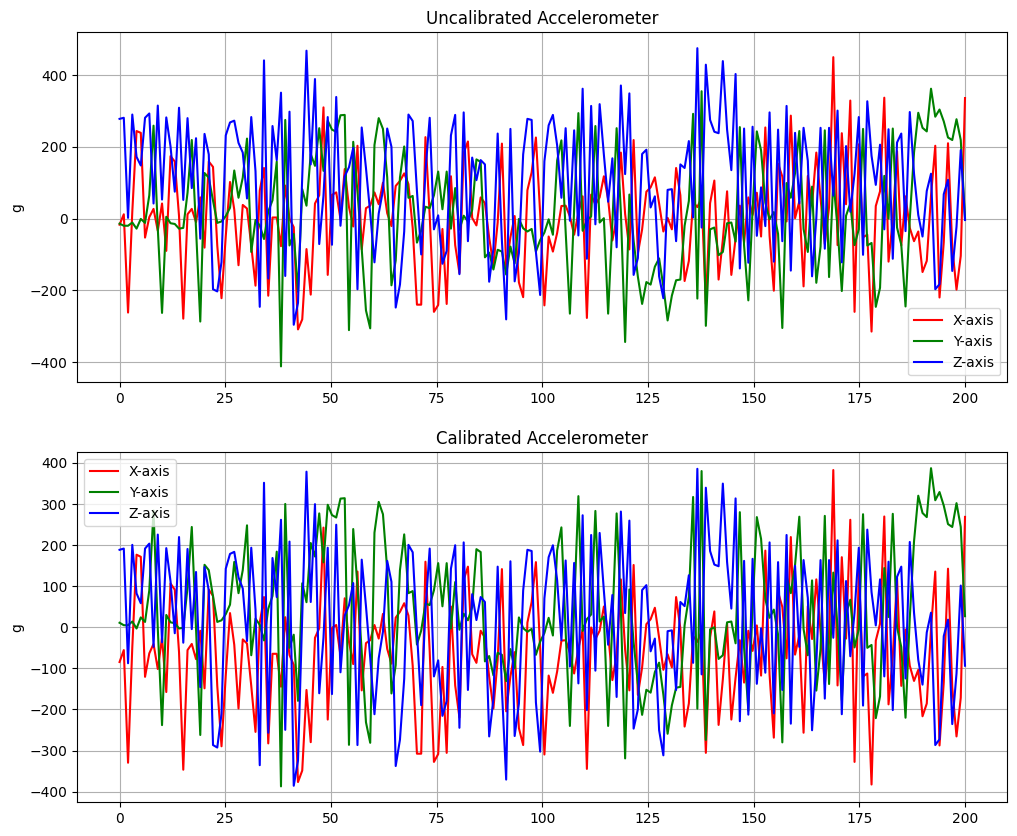

In [10]:
fig, (uncal, cal) = plt.subplots(2, 1, figsize=(12, 10), gridspec_kw={'hspace': 0.2})

# Clear all axis
uncal.cla()
t = np.linspace(0, len(accel_x), len(accel_x))
# Plot uncalibrated data
uncal.plot(t, accel_x, color='r')
uncal.plot(t, accel_y, color='g')
uncal.plot(t, accel_z, color='b')
uncal.title.set_text("Uncalibrated Accelerometer")
uncal.legend(['X-axis', 'Y-axis', 'Z-axis'])
uncal.set(ylabel='g')
uncal.grid(True)
# Plot calibrated data
cal.plot(t, [x - accel_cal[0] for x in accel_x], color='r')
cal.plot(t, [y - accel_cal[1] for y in accel_y], color='g')
cal.plot(t, [z - accel_cal[2] for z in accel_z], color='b')
cal.title.set_text("Calibrated Accelerometer")
cal.legend(['X-axis', 'Y-axis', 'Z-axis'])
cal.set(ylabel='g')
cal.grid(True)

In [11]:
countdown = 3
reading_counts = 200
print(f"Collecting {reading_counts} readings from {ser.port}...")
for i in range(countdown):
    print(f"Reading start in {countdown - i} seconds...", end='\r')
    time.sleep(1)

afterXYZ = reading_accelerometer(reading_counts)

Reading start in 1 seconds...
Reading started.
Collected 200 readings.


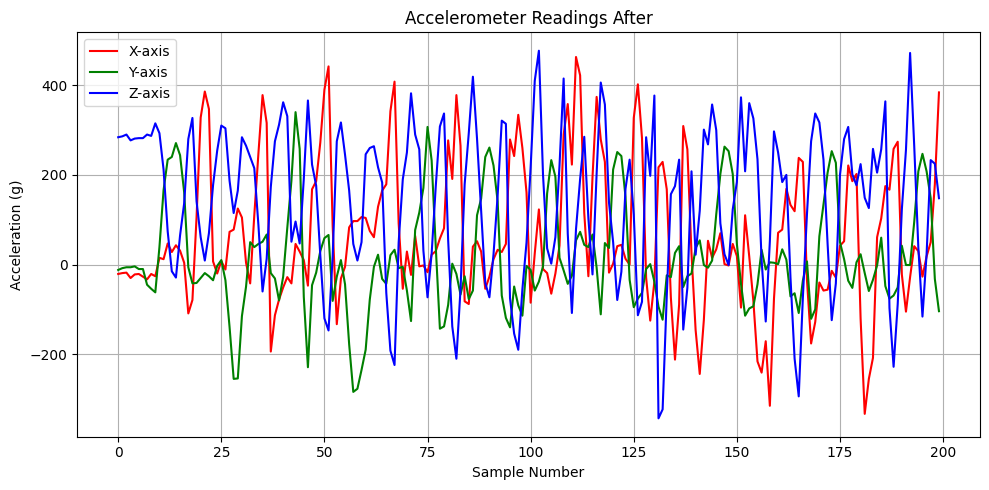

In [12]:
df_new = pd.DataFrame(afterXYZ, columns=['X', 'Y', 'Z'])
plt.figure(figsize=(10, 5))
plt.plot(df_new['X'], label='X-axis', color='r')
plt.plot(df_new['Y'], label='Y-axis', color='g')
plt.plot(df_new['Z'], label='Z-axis', color='b')

plt.title('Accelerometer Readings After')
plt.xlabel('Sample Number')
plt.ylabel('Acceleration (g)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [13]:
accel_x = df_new['X'].values
accel_y = df_new['Y'].values
accel_z = df_new['Z'].values

max_x = np.max(accel_x)
max_y = np.max(accel_y)
max_z = np.max(accel_z)
min_x = np.min(accel_x)
min_y = np.min(accel_y)
min_z = np.min(accel_z)

accel_cal = [ (max_x + min_x) / 2, 
              (max_y + min_y) / 2, 
              (max_z + min_z) / 2 ]

print(f"Calibration factor values : {min_x}, {max_x}, {min_y}, {max_y}, {min_z}, {max_z}")
print(f"Calibration values: {accel_cal[0]}, {accel_cal[1]}, {accel_cal[2]}")


Calibration factor values : -333.0, 463.0, -284.0, 340.0, -343.0, 477.0
Calibration values: 65.0, 28.0, 67.0
